In [2]:
import numpy as np
import struct

width = 240
height = 180

xc = 92

def load_img(name, width = width, height=height):
    with open(rf"v3/{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("H", fileContent):
        img[x,y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def zeroToNone(v):
    return v if v > 0 else None

def draw_yline(ax, img, x, label=""):
    y = range(height)
    x1 = [zeroToNone(img[x,height-i-1]) for i in y]
    ax.scatter(y, x1, label=f"{label}{x}")

def draw_xline(ax, img, y, label=""):
    x = range(width)
    y1 = [zeroToNone(img[i,height-y-1]) for i in x]
    ax.scatter(x, y1, label=f"{label}{y}")

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)

[ 2.02517091e-06 -3.11395323e-03  1.75189192e+00 -2.26627776e+02]


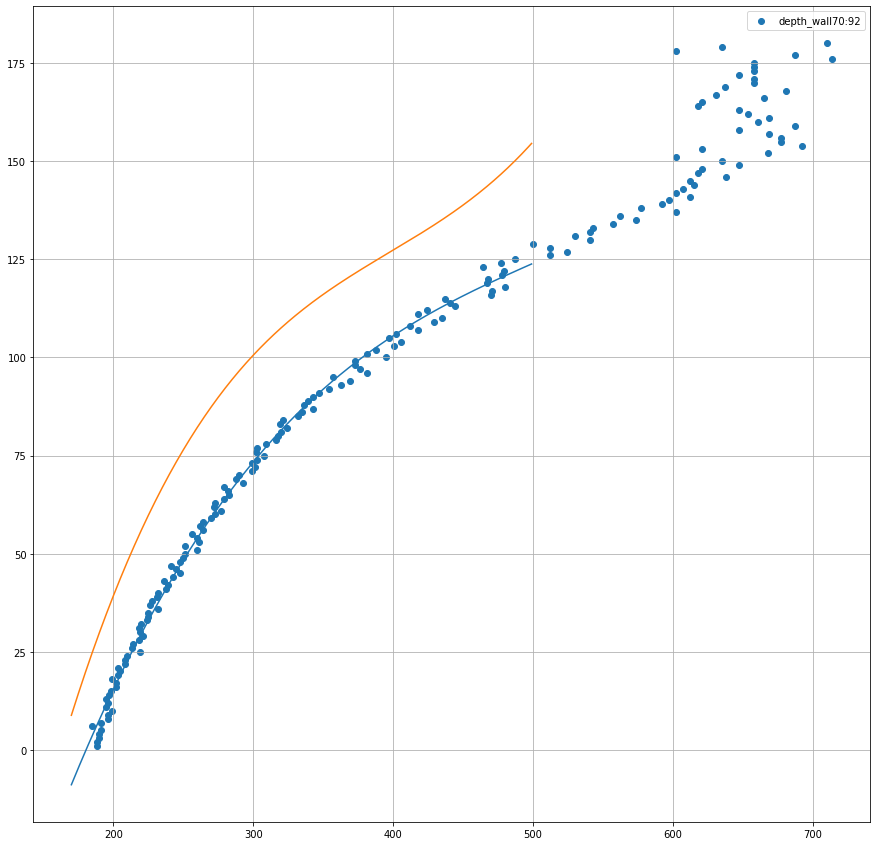

In [4]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0, pa, pv):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)
        if height - y < 150:
            pa.append(d)
            pv.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

pa = []
pv = []
    
dscatter("depth_wall70", xc, pa, pv)
#dscatter("depth_stay50", xc, pa, pv)

c = np.polyfit(pa, pv, 3)
print(c)
xp = []
yp = []
for x in range(170, 500):
    xp.append(x)
    v = 0
    for k in c:
        v = v * x + k
    yp.append(v)
ax.plot(xp,yp)

c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
xp = []
yp = []
for x in range(170, 500):
    xp.append(x)
    v = 0
    for k in c:
        v = v * x + k
    yp.append(v)
ax.plot(xp,yp)




    
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

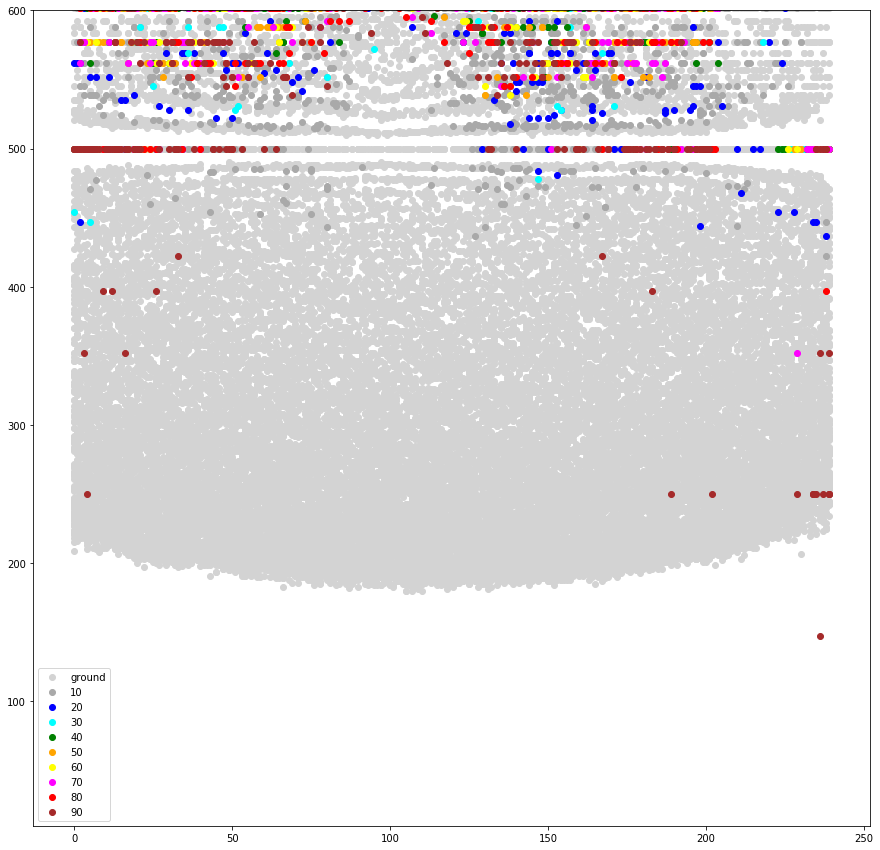

In [58]:
from collections import defaultdict
from math import *
from tabulate import tabulate
from IPython.display import HTML, display

import matplotlib.pyplot as plt

def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    #c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    c = [ 2.02517091e-06, -3.11395323e-03,  1.75189192e+00, -2.26627776e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v

def fh(y,d):
    return (height - y - fy(d)) * (d / 250) 

def fh2(y, d):
    return (y - fy(d)) * (d / 250) 


def map1(ax, file):
    img = load_img(file)
    colors = ["lightgray", "darkgray", "blue", "cyan", "green", "orange", "yellow", "magenta", "red", "brown"]
    levels = [90, 80, 70, 60, 50, 40, 30,20, 10]
    xl = defaultdict(lambda:[])
    dl = defaultdict(lambda:[])
    
    for y in range(height):
        for x in range(width):
            d = img[x, height - y - 1]
            #h = fh(height - y - 1,d)
            h = fh2(y,d)
            #print(x,height - y - 1,d,h)
            lower = True
            for l in levels:
                if h > l:
                    xl[l].append(x)
                    dl[l].append(d)
                    lower = False
                    break
            if lower:
                xl["lower"].append(x)
                dl["lower"].append(d)
                
                    
    c = 0
    if "lower" in xl:
        ax.scatter(xl["lower"], dl["lower"], label = "ground", c=colors[c])
        c += 1
    for i in range(len(levels)):
        lv = levels[-i-1]
        if lv in xl:
            ax.scatter(xl[lv], dl[lv], label = f"{lv}", c=colors[c])
        c += 1
 


plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_wall70")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

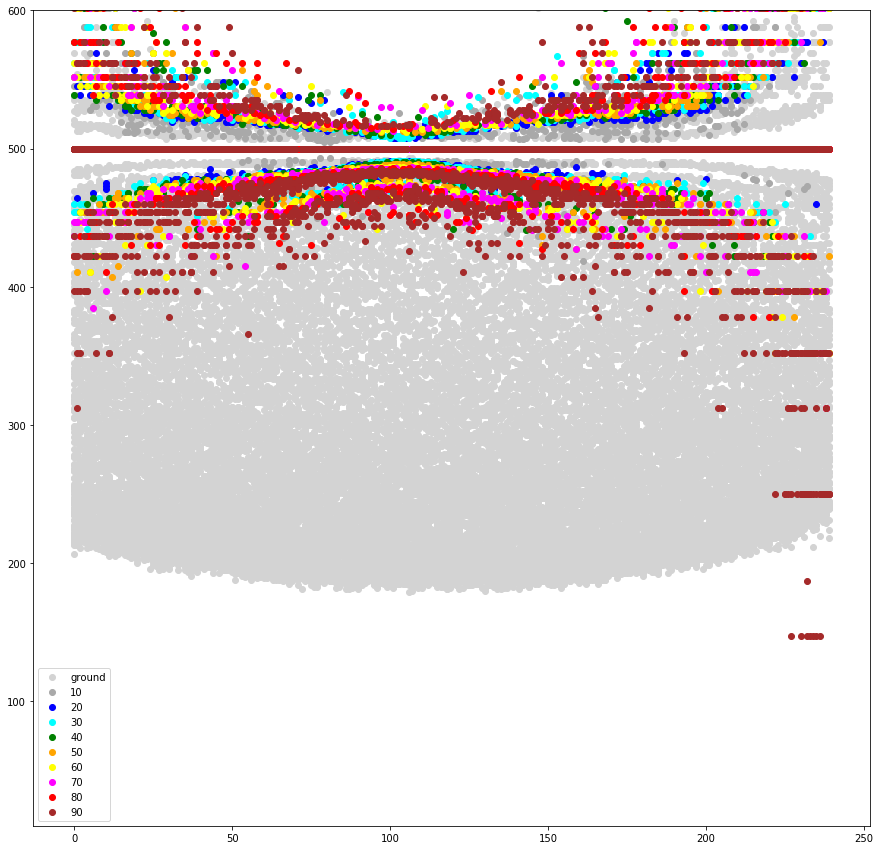

In [57]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_wall50")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

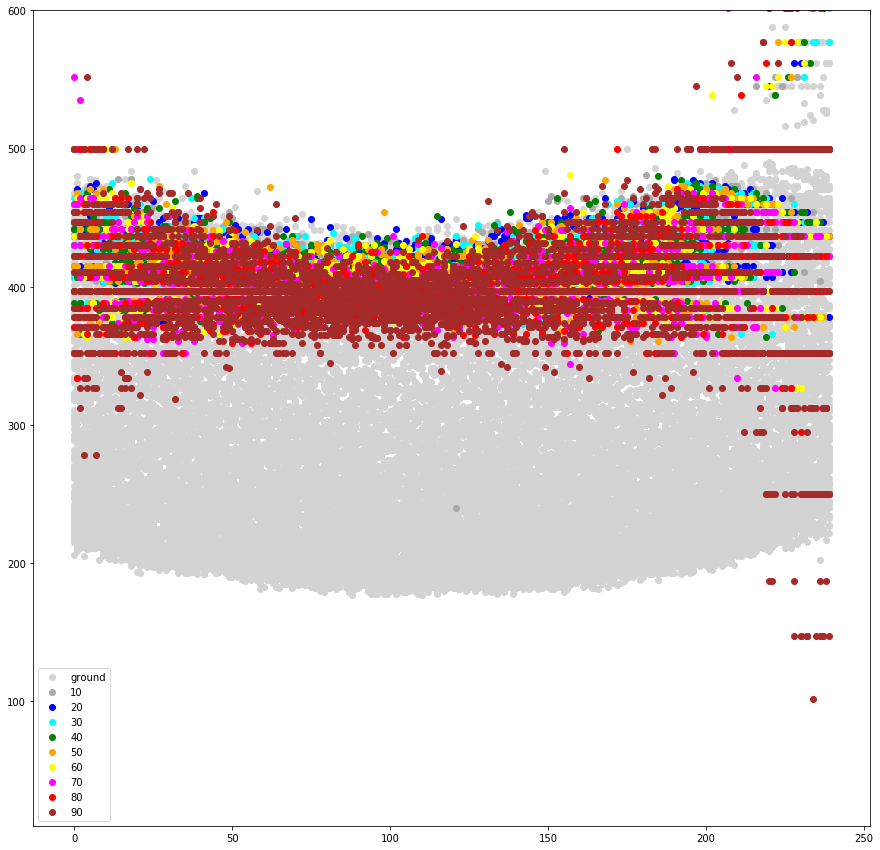

In [59]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_wall40")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

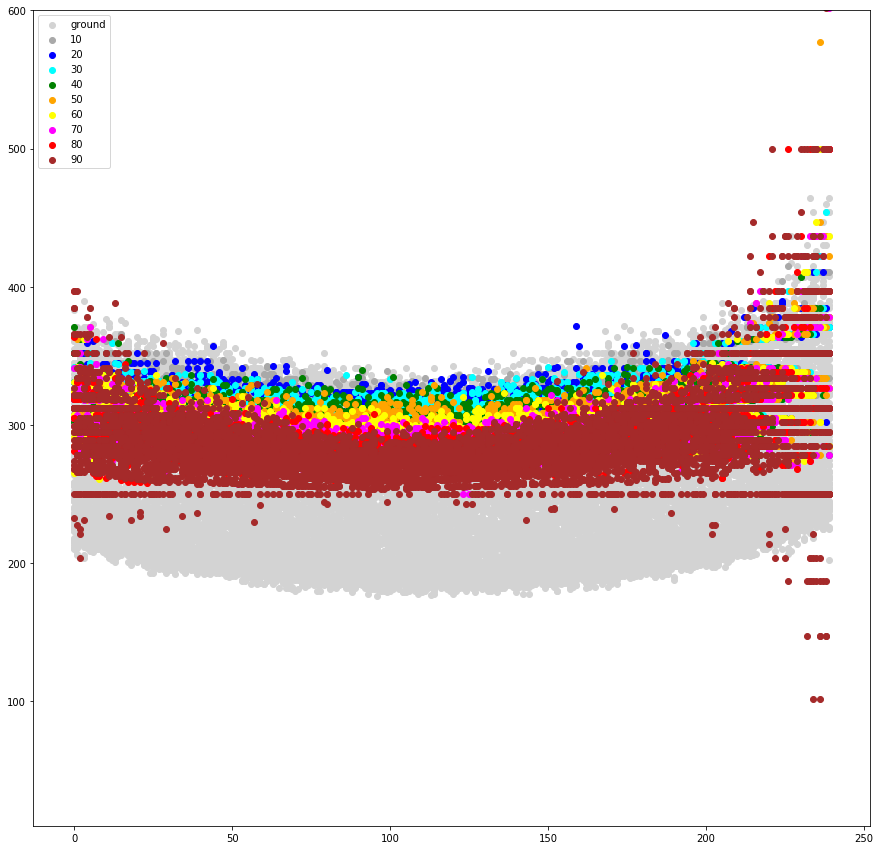

In [60]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_wall30")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

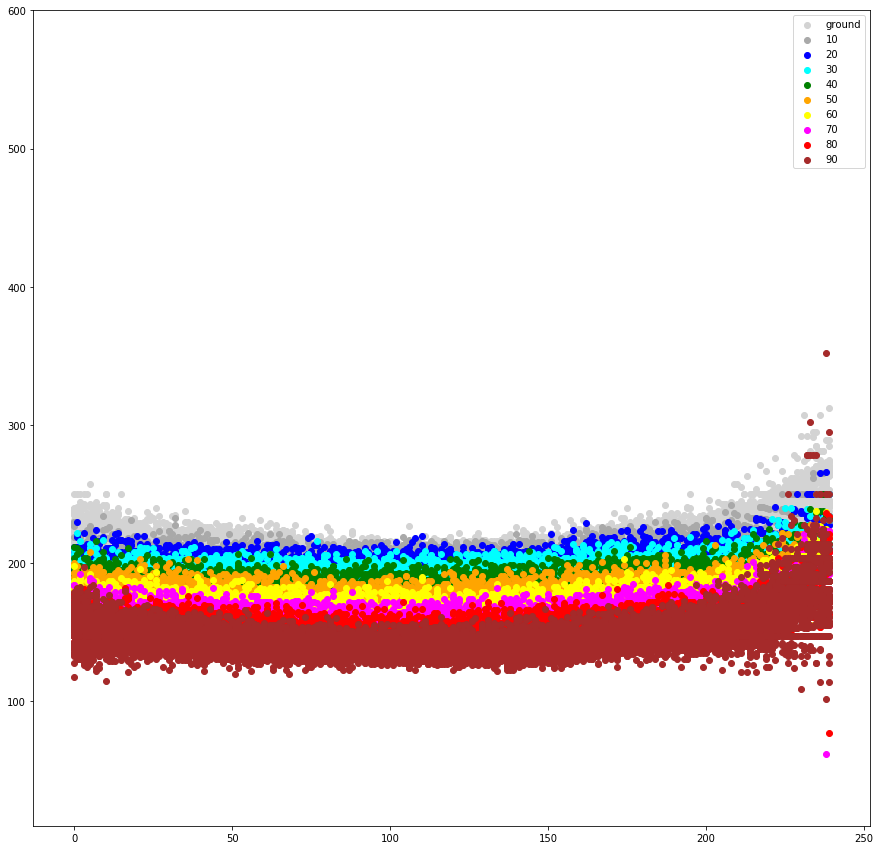

In [61]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_wall20")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

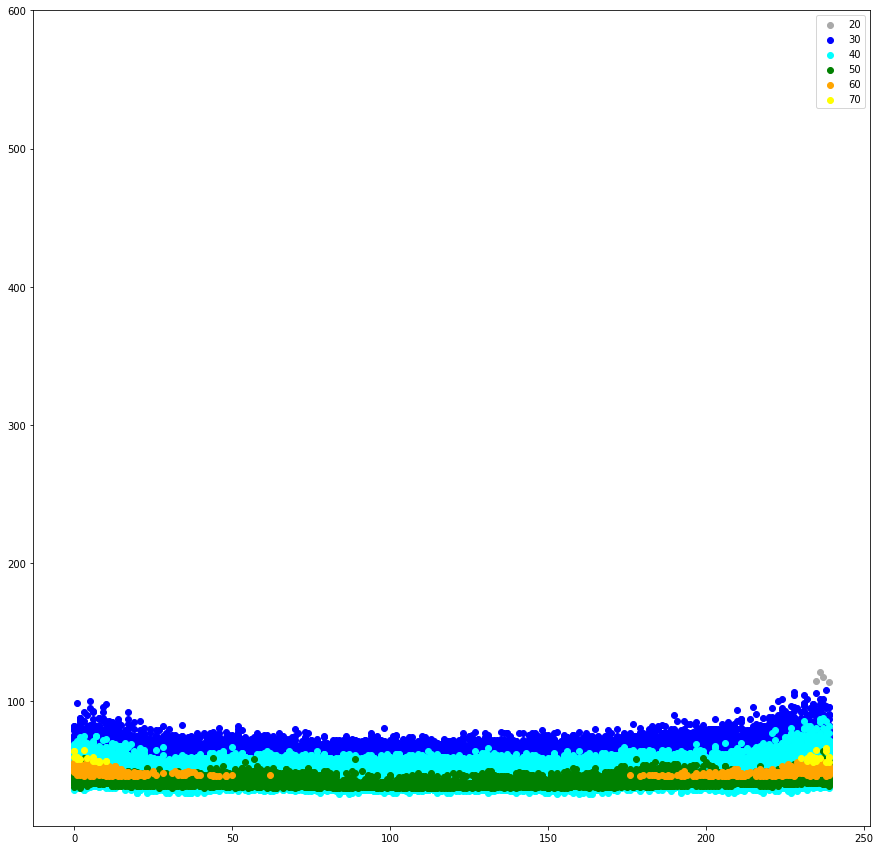

In [62]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_wall10")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

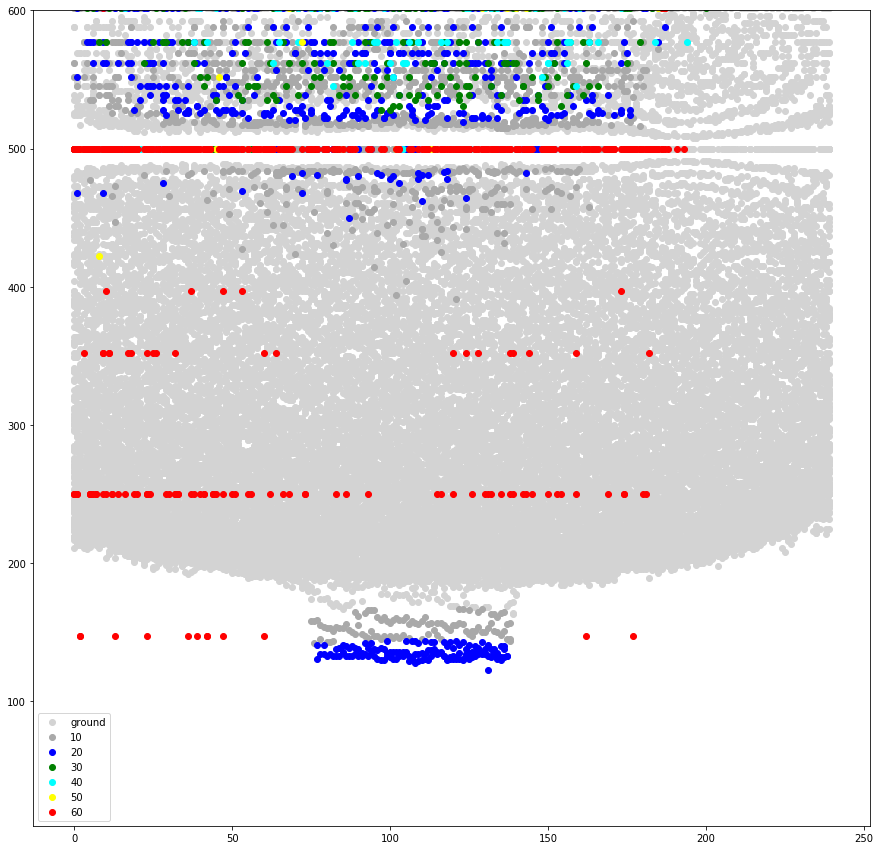

In [48]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_side10")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

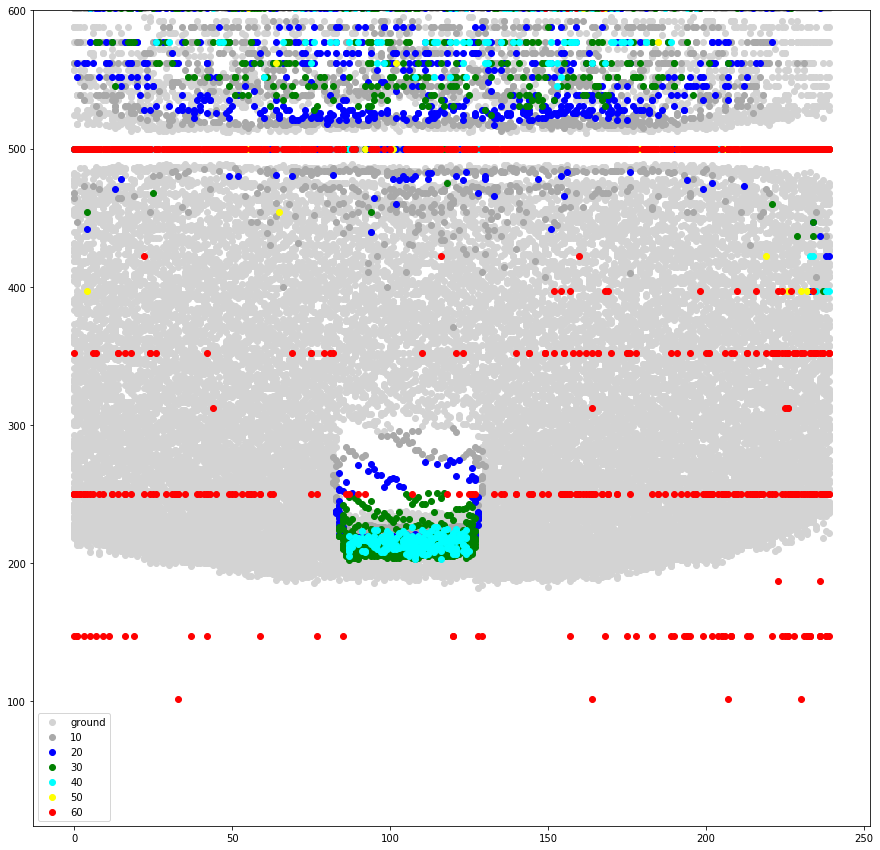

In [49]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_side20")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

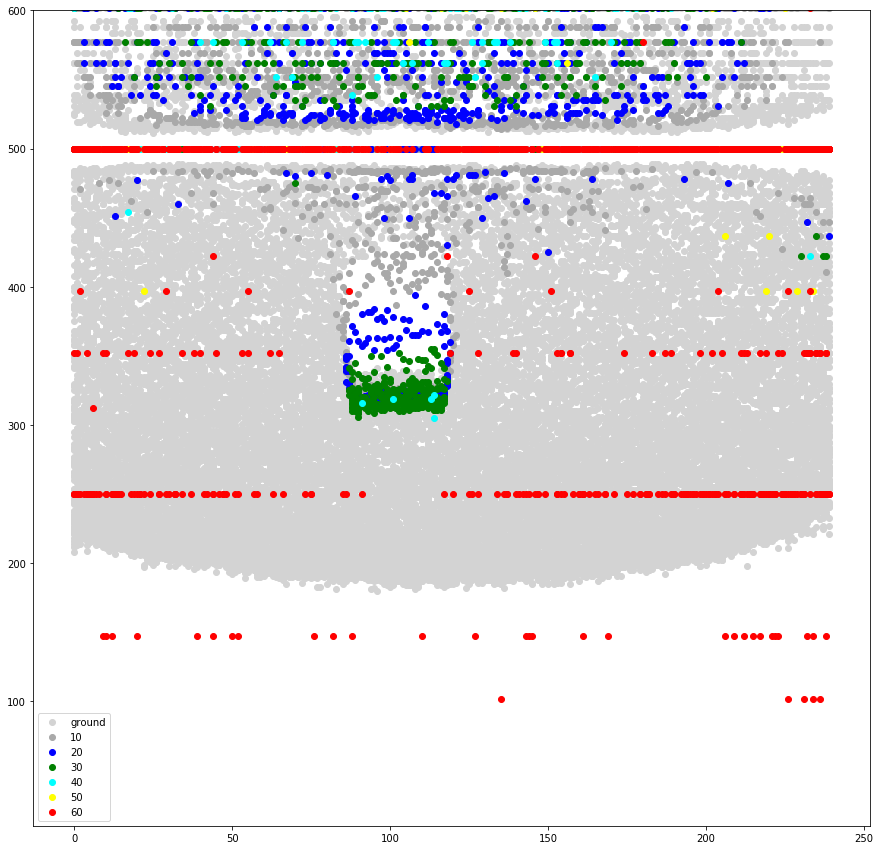

In [41]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_side30")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

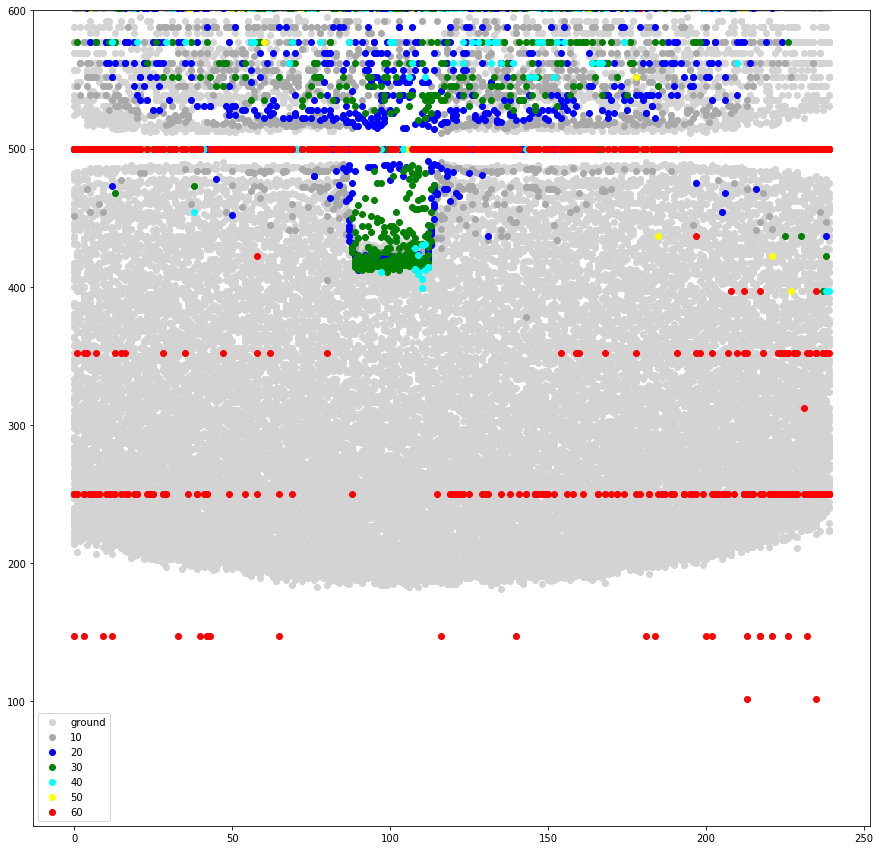

In [50]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_side40")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

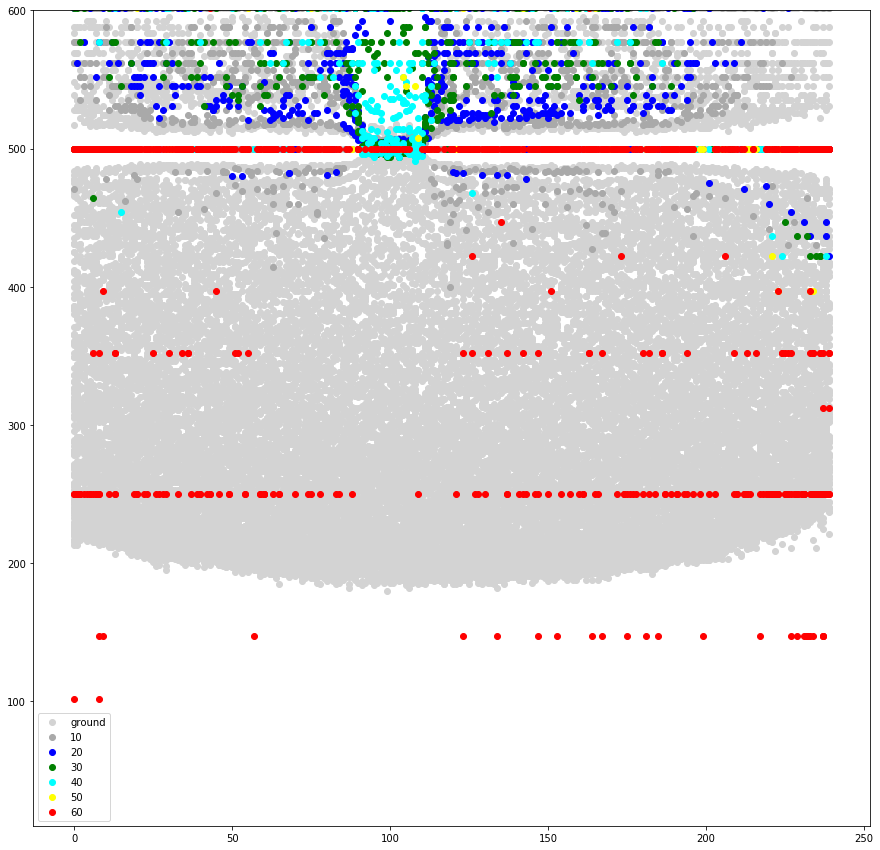

In [51]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

map1(ax,"depth_side50")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

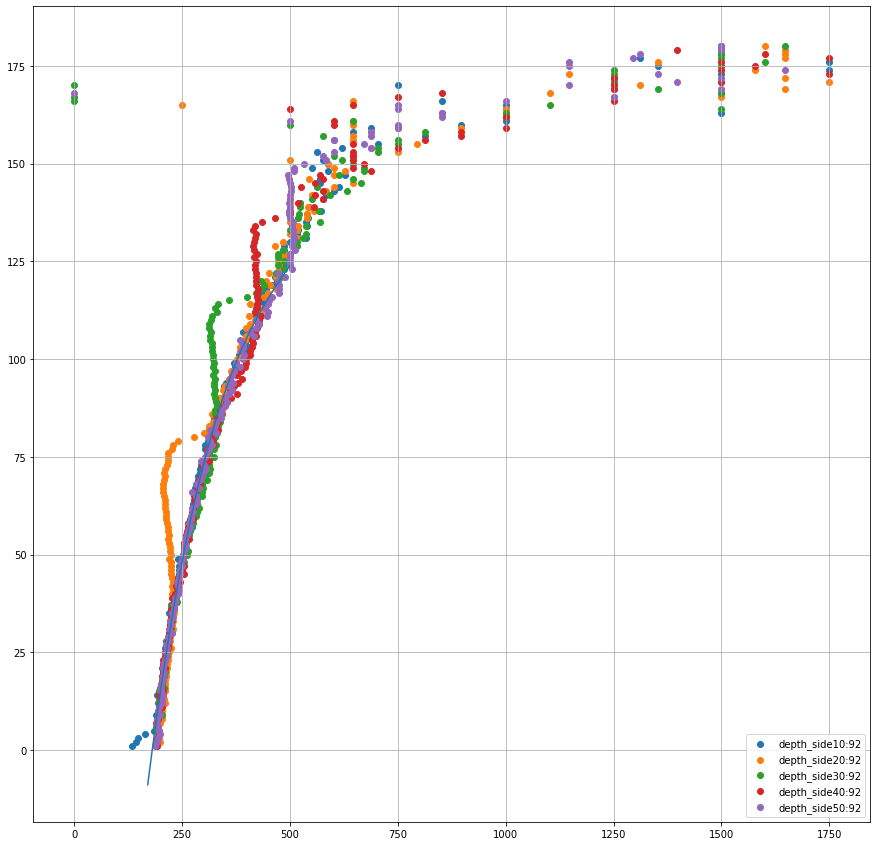

In [44]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(ax, file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter(ax, "depth_side10", xc)
dscatter(ax, "depth_side20", xc)
dscatter(ax, "depth_side30", xc)
dscatter(ax, "depth_side40", xc)
dscatter(ax, "depth_side50", xc)

xp = []
yp = []
for x in range(170, 500):
    xp.append(x)
    yp.append(fy(x))
ax.plot(xp,yp)

    
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

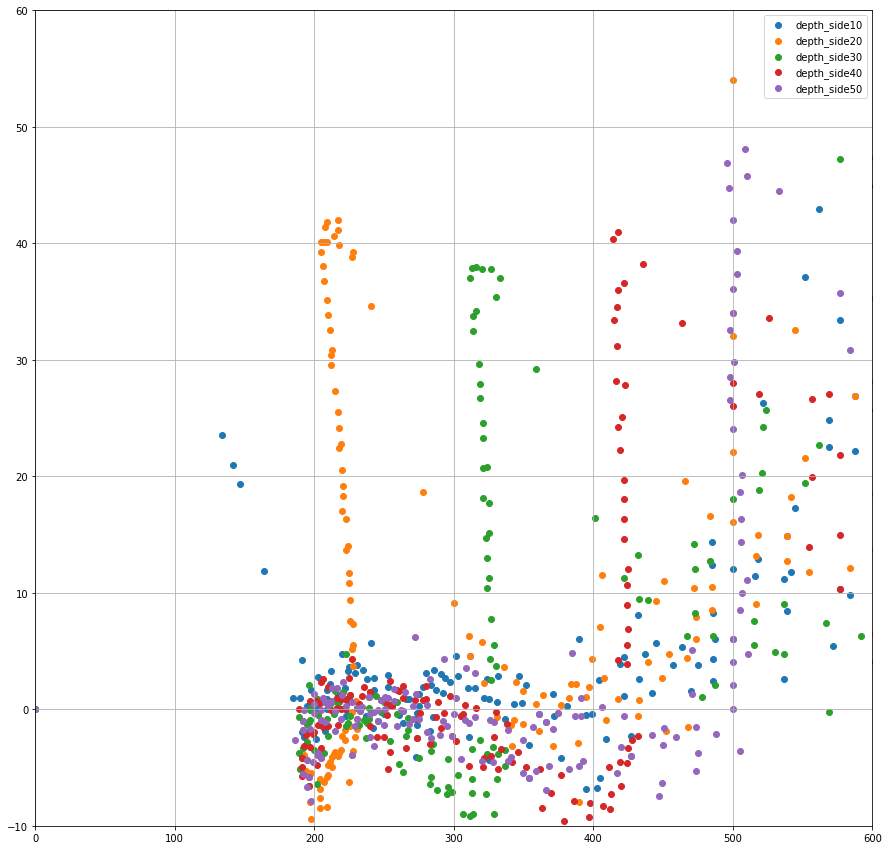

In [52]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter2(ax, file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}")

dscatter2(ax, "depth_side10", xc)
dscatter2(ax, "depth_side20", xc)
dscatter2(ax, "depth_side30", xc)
dscatter2(ax, "depth_side40", xc)
dscatter2(ax, "depth_side50", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-10,60)
ax.set_xlim(0,600)
    
plt.show()

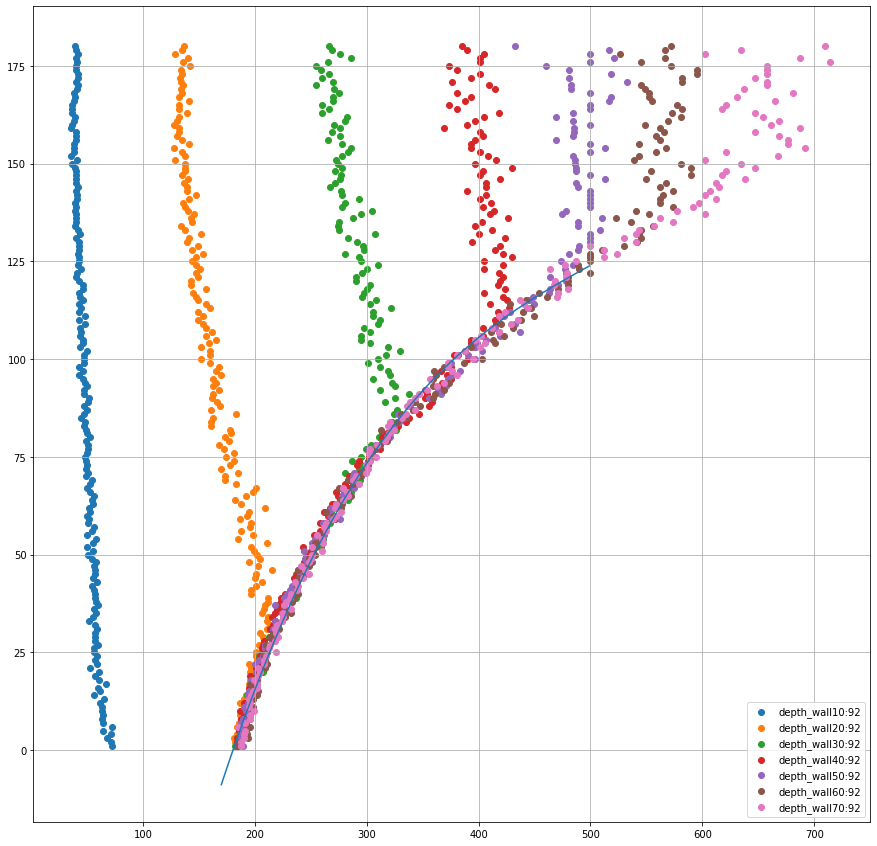

In [65]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(ax, file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter(ax, "depth_wall10", xc)
dscatter(ax, "depth_wall20", xc)
dscatter(ax, "depth_wall30", xc)
dscatter(ax, "depth_wall40", xc)
dscatter(ax, "depth_wall50", xc)
dscatter(ax, "depth_wall60", xc)
dscatter(ax, "depth_wall70", xc)

xp = []
yp = []
for x in range(170, 500):
    xp.append(x)
    yp.append(fy(x))
ax.plot(xp,yp)

    
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

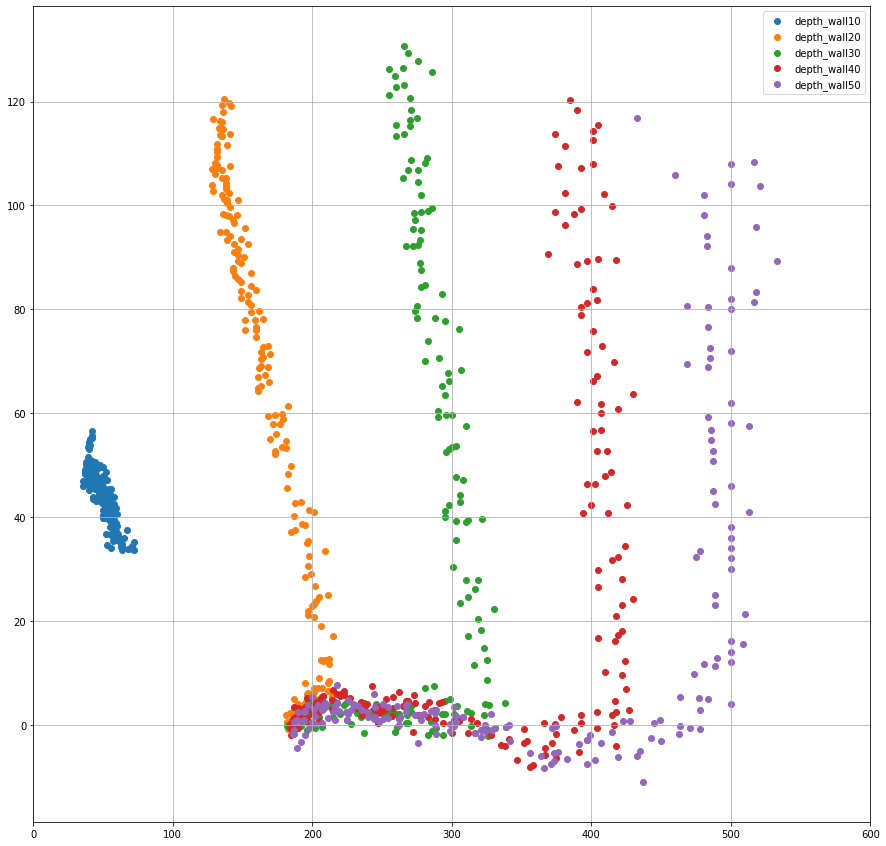

In [63]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter2(ax, file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}")

dscatter2(ax, "depth_wall10", xc)
dscatter2(ax, "depth_wall20", xc)
dscatter2(ax, "depth_wall30", xc)
dscatter2(ax, "depth_wall40", xc)
dscatter2(ax, "depth_wall50", xc)

ax.grid(True)
ax.legend()
#ax.set_ylim(-10,60)
ax.set_xlim(0,600)
    
plt.show()